In [ ]:
import cv2 as cv

# 读取图片并显示
# 1.读取图片
# 2.显示图片
# 3.等待按键退出
img = cv.imread("Photos/1.png")
cv.imshow("image1", img)
cv.waitKey(0)

# 存在问题，文件像素太大，屏幕无法显示

In [56]:
import cv2 as cv

# 读取视频

video = cv.VideoCapture("Videos/rain.mp4")

while True:
    # 读取视频帧
    ret, frame = video.read()
    if not ret:
        print("视频读取失败")
        break
    # 显示视频帧
    cv.imshow("VideoRain", frame)
    # waitkey(20)等待20ms，然后检查是否有按键按下;
    # 0xFF 掩码可以确保我们只比较按键的低 8 位;
    # 从而避免由于高位的干扰导致的错误判断;
    # 这在处理键盘输入时是一个常见的做法;
    if cv.waitKey(20) & 0xFF == ord("q"):
        break

# 释放视频资源
video.release()
cv.destroyAllWindows()

cv.waitKey(0)

-1

- 如何对Photo和Video进行Resize
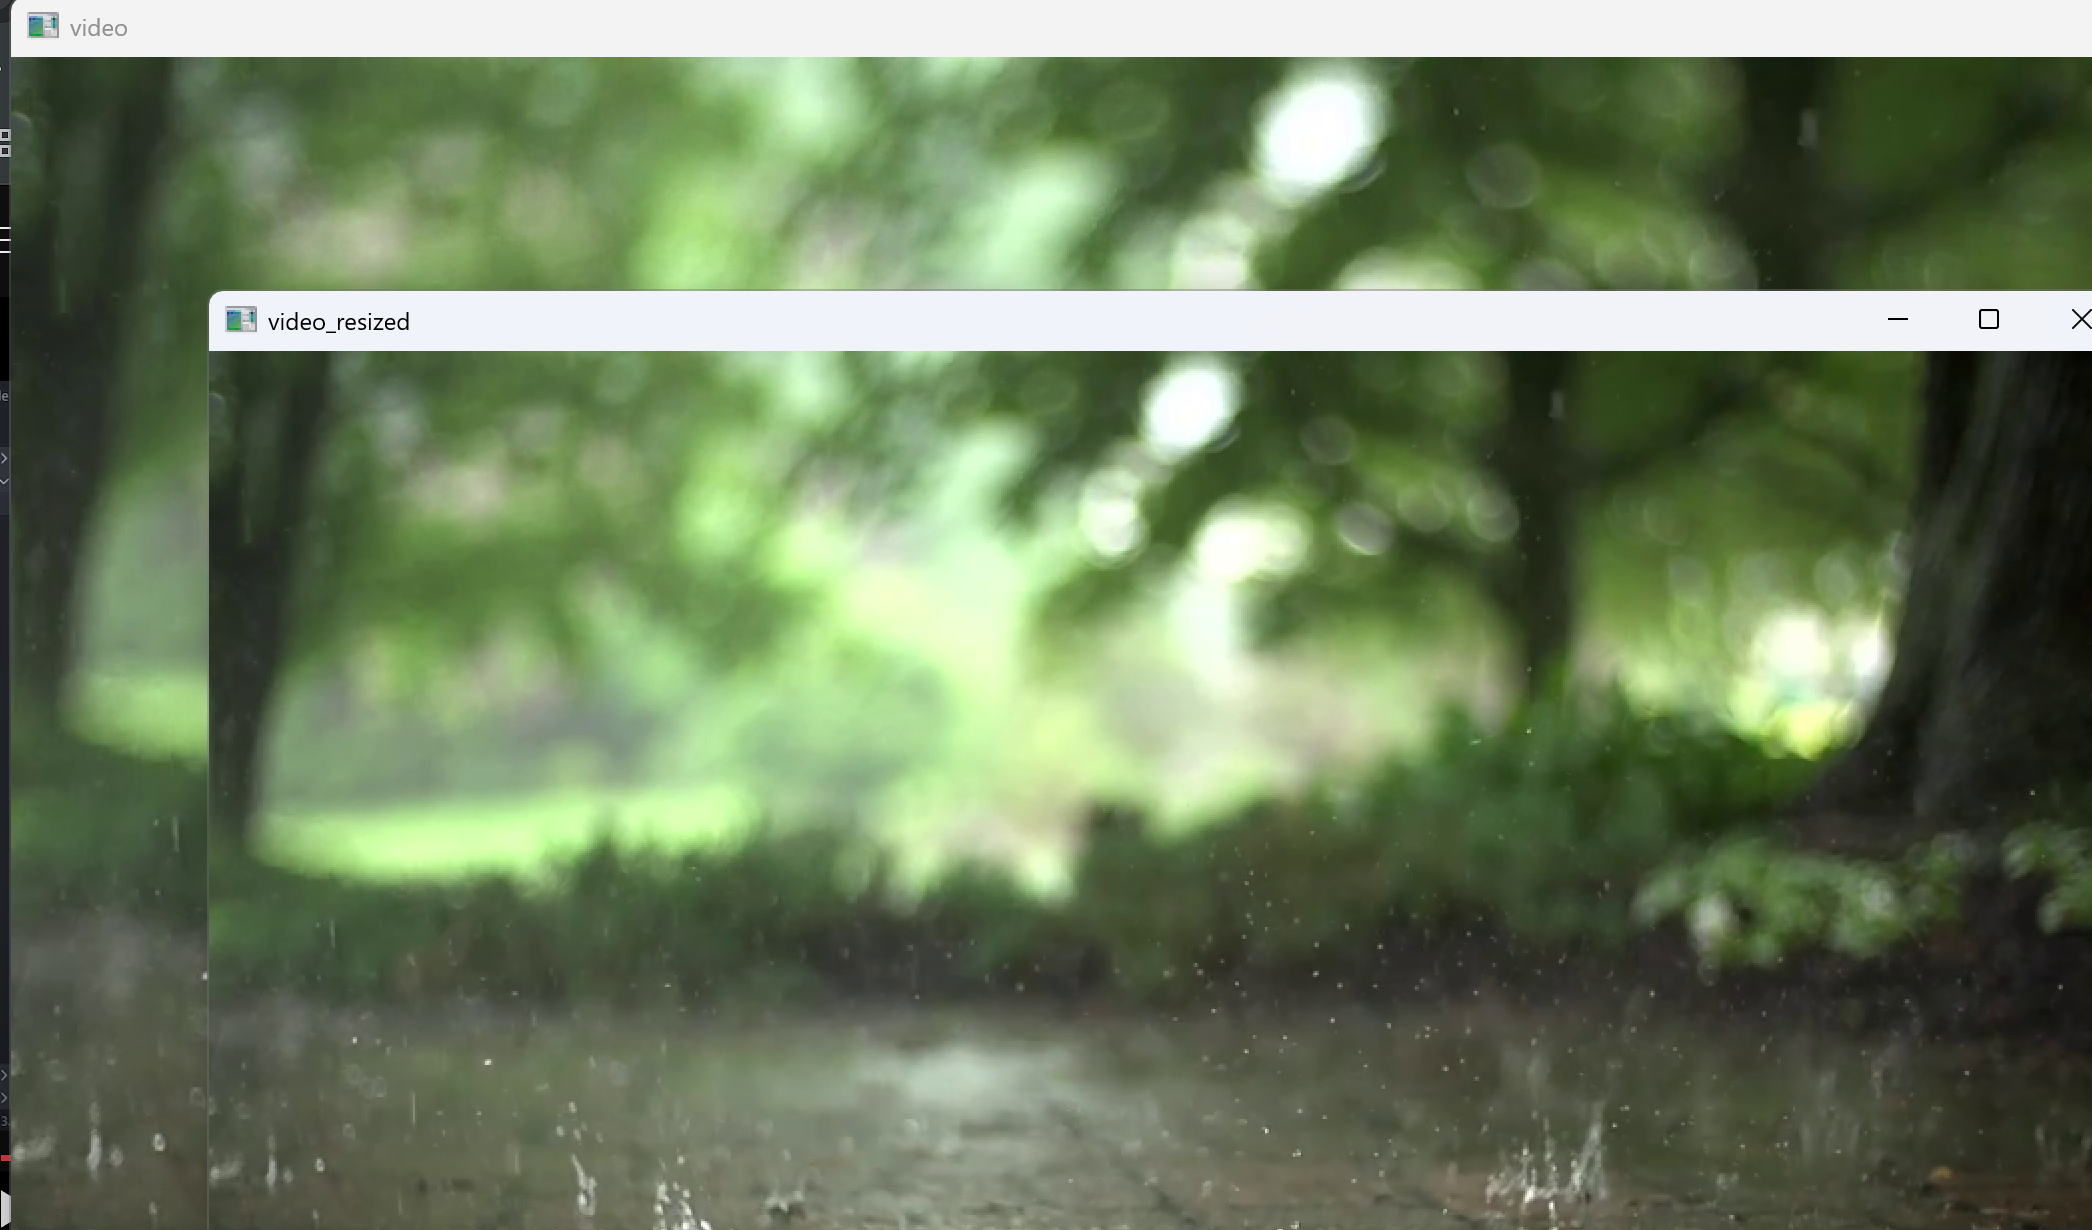

In [57]:
# how to resize photos or videos

import cv2 as cv


def rescaleFrame(frame, scale=0.75):
    """resize frame"""
    width = int(frame.shape[1] * scale)
    height = int(frame.shape[0] * scale)
    dimensions = (width, height)
    return cv.resize(frame, dimensions, interpolation=cv.INTER_AREA)


# img = cv.imread("Photos/1.png")
# cv.imshow("image1", img)
# resized_img = resize(img, 0.2)
# cv.imshow("image1_resized", resized_img)


video = cv.VideoCapture("Videos/rain.mp4")
while True:
    ret, frame = video.read()
    if not ret:
        break
    frame_resized = rescaleFrame(frame)
    cv.imshow("video", frame)
    cv.imshow("video_resized", frame_resized)

    if cv.waitKey(1) & 0xFF == ord("q"):
        break

video.release()
cv.destroyAllWindows()

cv.waitKey(0)

-1

- 常用的绘图操作
  - 使用np绘制二维数组Blank
  - 改变np数组的颜色
  - rectangle 绘制矩形
  - cirlce 绘制圆形
  - line 绘制线段
  - putText 绘制文字

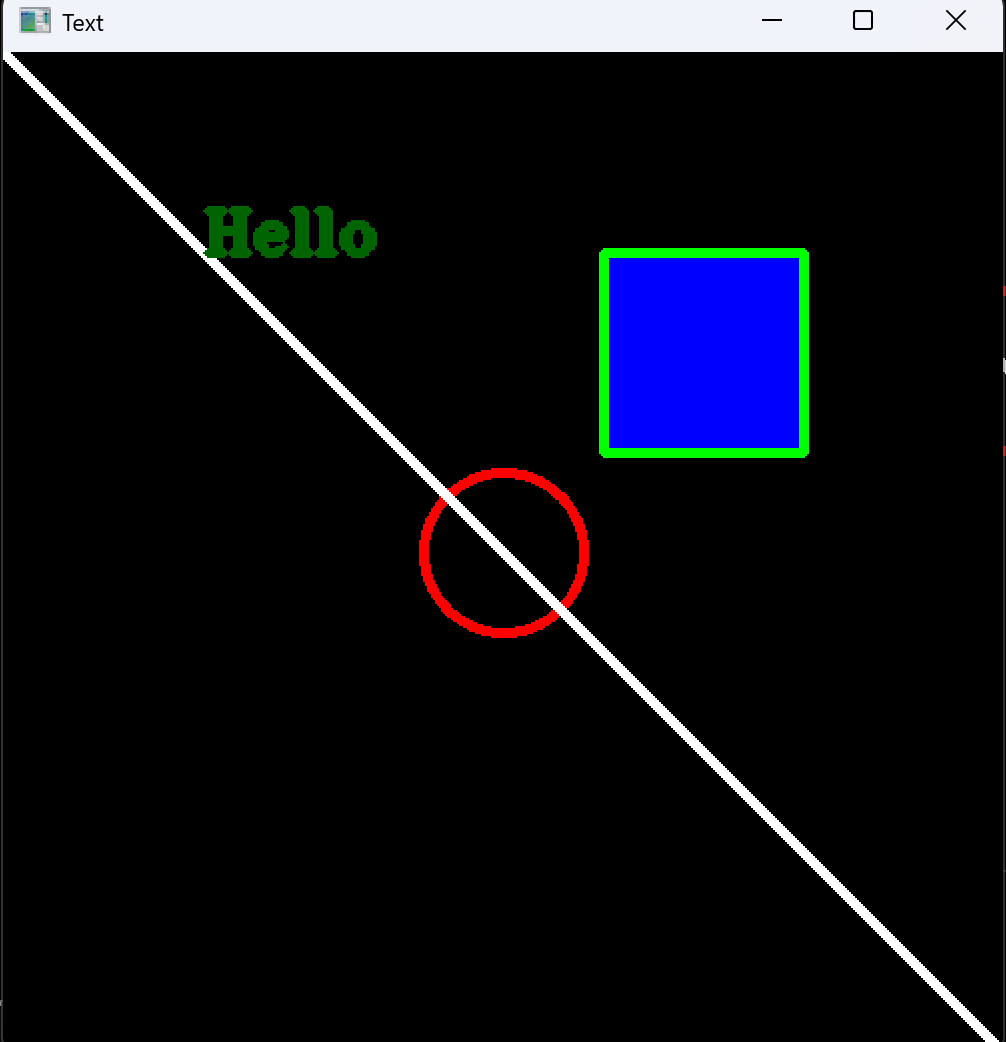

In [58]:
# draw
import cv2 as cv
import numpy as np

blank = np.zeros((500, 500, 3), dtype="uint8")
# cv.imshow("Blank", blank)


# change color
rowMin = 100
rowMax = 200
colMin = 300
colMax = 400
blank_red = np.zeros((500, 500, 3), dtype="uint8")
blank_red[rowMin:rowMax, colMin:colMax] = [255, 0, 0]
cv.imshow("Red", blank_red)

# draw a rectangle
cv.rectangle(
    blank_red,
    (colMin, rowMin),
    (colMax, rowMax),
    (0, 255, 0),
    thickness=3,
    # fill the rectangle
    # thickness=-1,
)
cv.imshow("Rectangle", blank_red)

# draw a circle
pos = blank_red.shape[1] // 2, blank_red.shape[0] // 2
cv.circle(blank_red, pos, 40, (0, 0, 255), thickness=3)
cv.imshow("Circle", blank_red)

# draw a line
cv.line(blank_red, (0, 0), (500, 500), (255, 255, 255), thickness=3)
cv.imshow("Line", blank_red)

# draw a text
cv.putText(
    blank_red,
    "Hello",
    (100, 100),
    cv.FONT_HERSHEY_TRIPLEX,
    1.0,
    (0, 100, 0),
    thickness=3,
)
cv.imshow("Text", blank_red)

cv.waitKey(0)
cv.destroyAllWindows()

- 一些图像处理常用的API
  - BGR2GRAY 将图像从BGR转换为灰度图
  - GussianBlur 对图像进行高斯模糊处理
  - Canny 对图像进行边缘检测
  - dilate 对图像进行膨胀操作
  - erode 对图像进行腐蚀操作
  - resize 对图像进行缩放
  - crop 对图像进行裁剪
- 效果如下图所示：
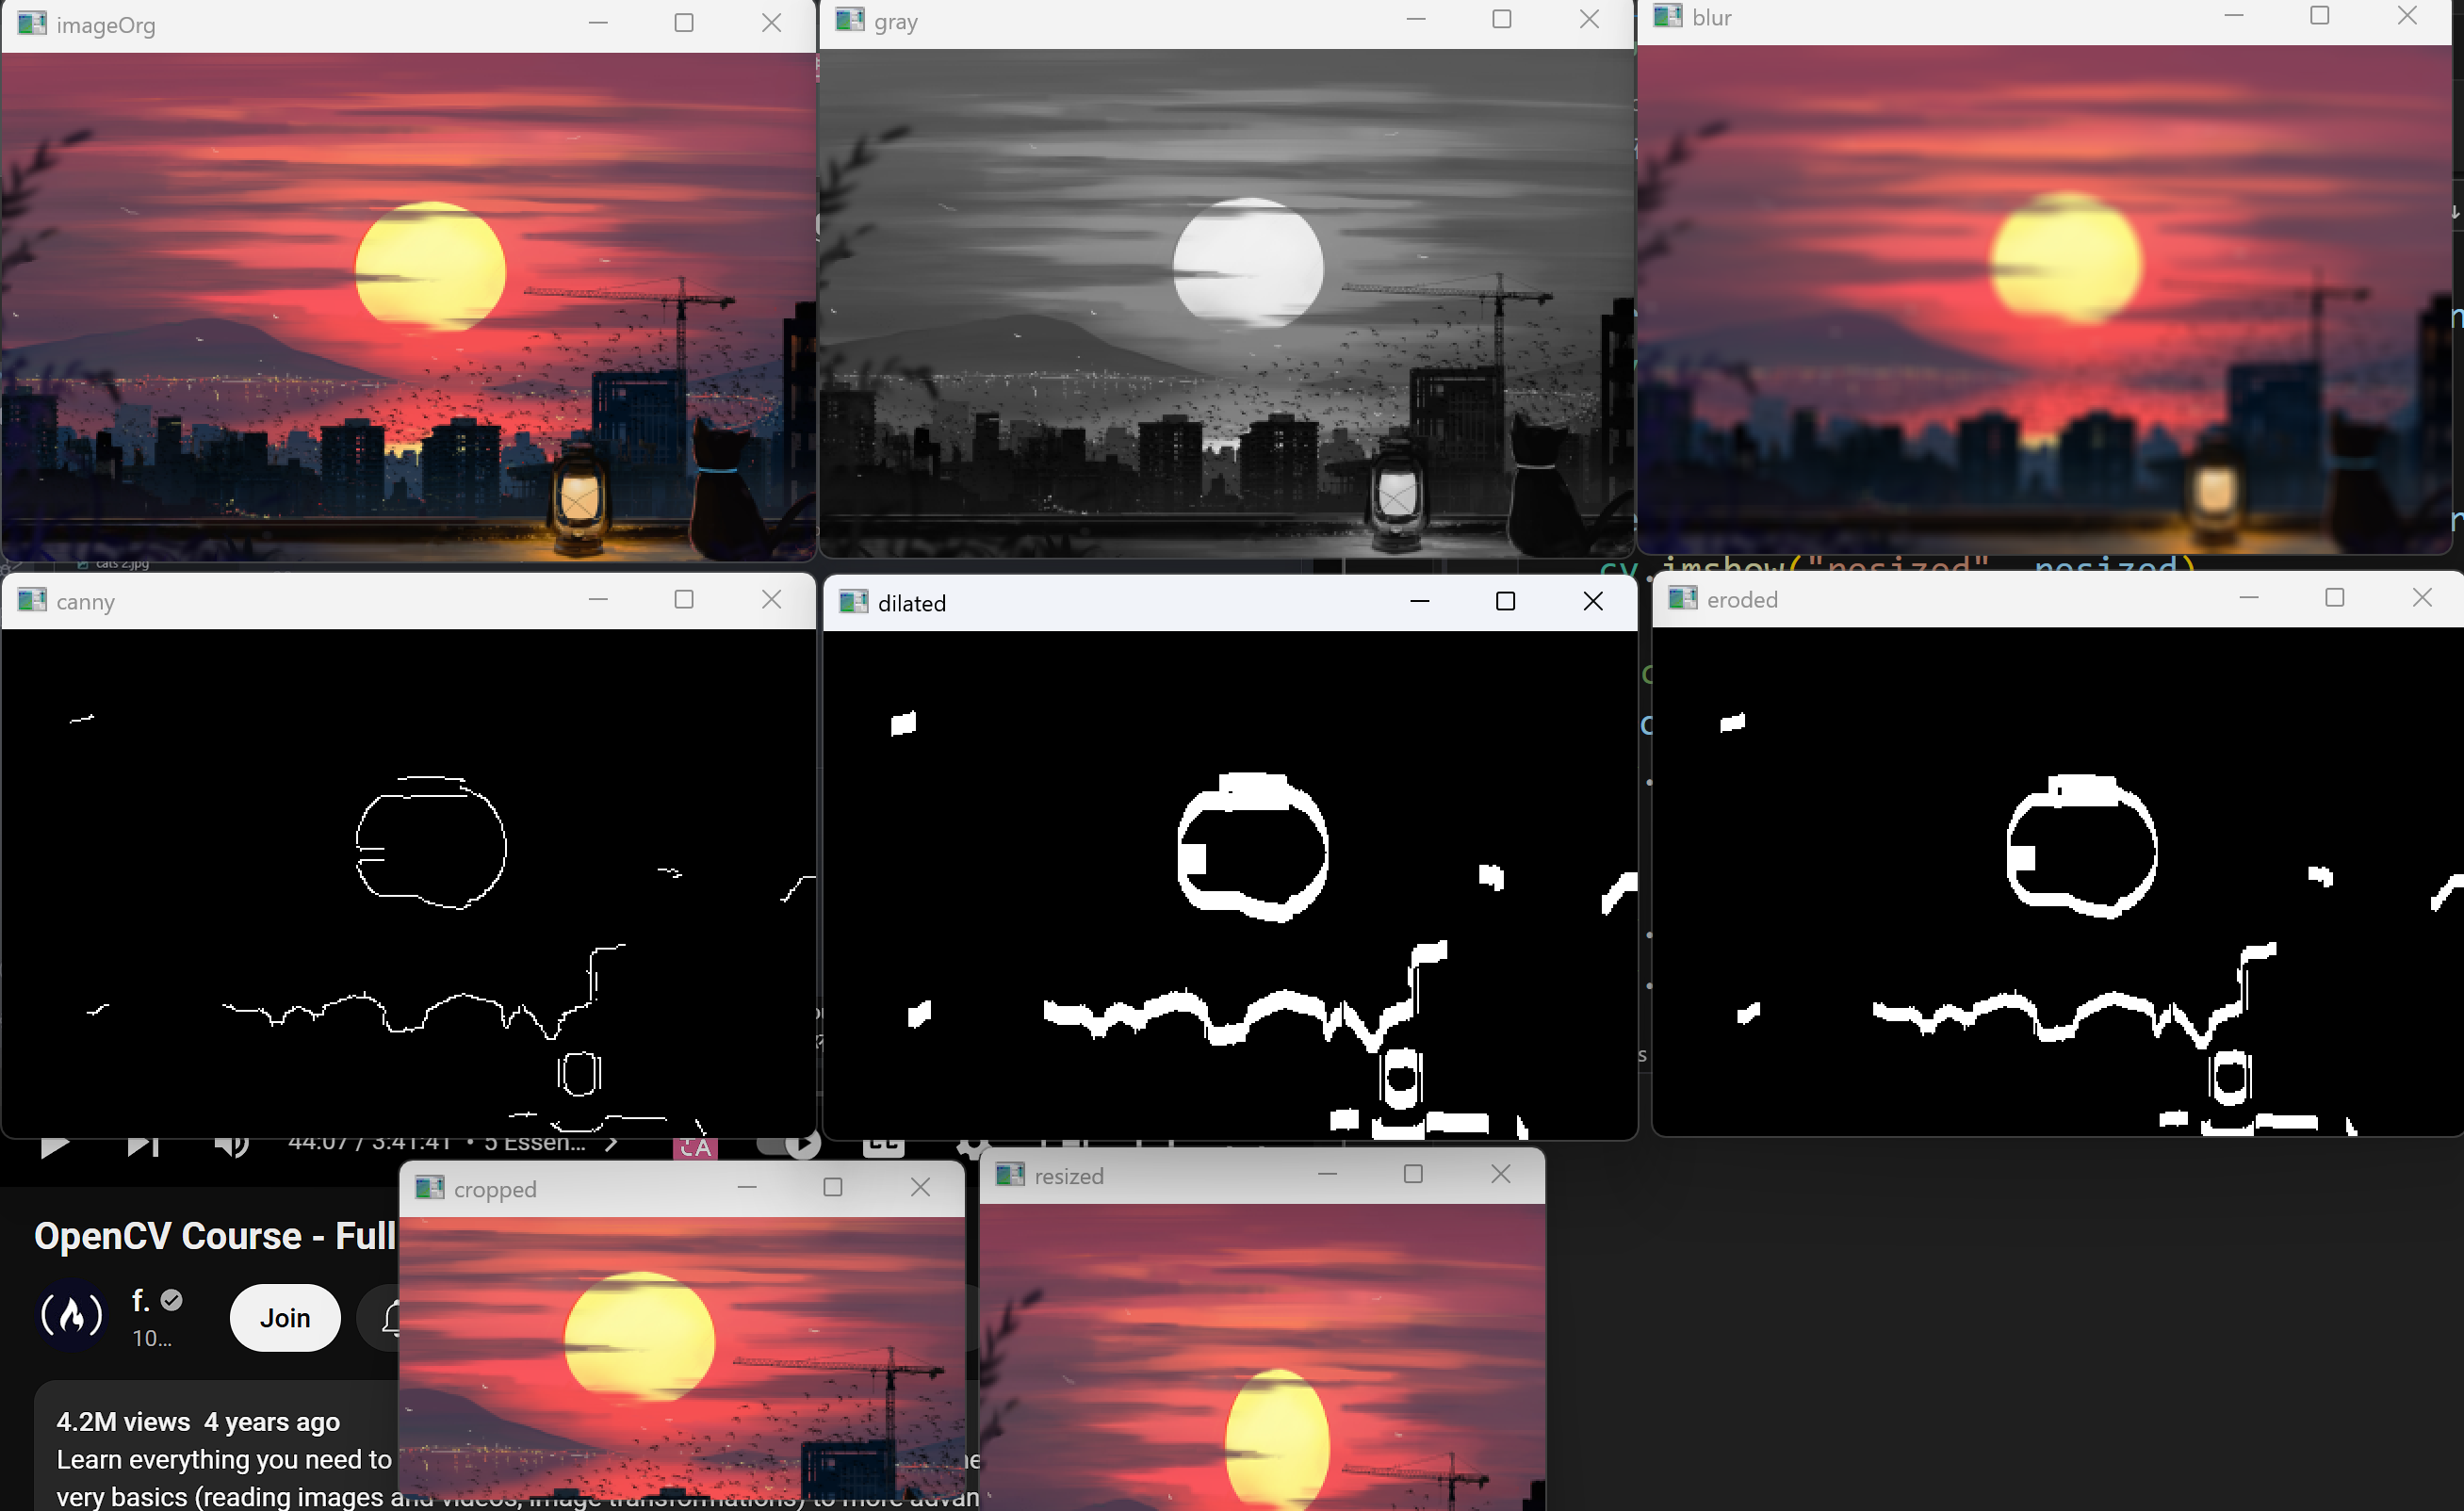

In [55]:
# basic api
# gray

import cv2 as cv


def rescaleFrame(frame, scale=0.15):
    """resize frame"""
    width = int(frame.shape[1] * scale)
    height = int(frame.shape[0] * scale)
    dimensions = (width, height)
    return cv.resize(frame, dimensions, interpolation=cv.INTER_AREA)


img = rescaleFrame(cv.imread("Photos/4.png"))
cv.imshow("imageOrg", img)

# gray scale 灰度转换算法
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow("gray", gray)

# Blur 高斯模糊算法
size = (7, 7)
blur = cv.GaussianBlur(img, size, cv.BORDER_DEFAULT)
cv.imshow("blur", blur)

# Edge Cascade 边缘检测算法
canny = cv.Canny(blur, 125, 175)
cv.imshow("canny", canny)


# Dilate 用于扩大边缘区域
dilated = cv.dilate(canny, size * 2, iterations=3)
cv.imshow("dilated", dilated)

# Erode 用于缩小边缘区域
eroded = cv.erode(dilated, size, iterations=3)
cv.imshow("eroded", eroded)

# resize 重新调整大小
resized = cv.resize(img, (300, 300), interpolation=cv.INTER_CUBIC)
cv.imshow("resized", resized)

# crop 裁剪
cropped = img[50:200, 100:400]
cv.imshow("cropped", cropped)


cv.waitKey(0)
cv.destroyAllWindows()